In [18]:
from __future__ import print_function
import nltk
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report
import sklearn.metrics
from pandas import DataFrame,Series
from sklearn.feature_extraction.text import TfidfVectorizer
from time import time
import re
import matplotlib.pyplot as plt
import os
from nltk.tokenize import SpaceTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
import string
from nltk.corpus import stopwords
from imblearn.under_sampling import RandomUnderSampler

c:\users\ashwin\anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
os.chdir(os.getcwd())

In [3]:
file_raw=open('F:\\trainingdata.txt','r')
file_data=file_raw.read()
data=file_data.split('\n')
dataframe=pd.DataFrame(data)
dataframe.drop(dataframe.index[0], inplace=True)
dataframe.columns =['data']
dataframe['target']=0

In [4]:
def extracting_target(data):
    count=1
    for doc in data['data']:
        if (count<=dataframe['data'].count() and not doc.isspace() and len(doc)>0):
            dataframe['target'][count]=int(doc[0])
        count=count+1

In [6]:
extracting_target(dataframe)
dataframe.count()
dataframe['target']=dataframe['target'].astype('category')
dataframe['target'].dtype

c:\users\ashwin\anaconda2\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


category

In [7]:
dataframe.describe(include='all')

,data,target
count,5486,5486
unique,5428,9
top,7 fed adds reserves via customer repurchases t...,1
freq,3,2840


In [8]:
sum(dataframe.duplicated())

58

In [9]:
dataframe.ix[dataframe.duplicated(keep='first'),]

,data,target
327,6 opec within output ceiling subroto says opec...,6
469,1 kasler corp kasl st qtr jan net shr profit t...,1
873,1 carmel container systems ltd kml year oper n...,1
1188,7 barclays midland follow natwest base rate cu...,7
1192,7 lloyds bank matches base rate cut to pct llo...,7
1339,8 hungary to devalue forint against western un...,8
1340,7 sumita says little room for bank to ease pol...,7
1349,3 soviet economist sees few gains in u s trade...,3
1600,6 china closes second round of offshore oil bi...,6
1601,2 leigh pemberton opposes takeover protection ...,2


In [10]:
dataframe=dataframe.drop_duplicates()
sum(dataframe.duplicated())

0

In [11]:
dataframe.shape

(5428, 2)

In [12]:
category_counter={x:0 for x in set(dataframe['target'])}
for each_cat in dataframe['target']:
    category_counter[each_cat]+=1
print(category_counter)

{0: 1, 1: 2835, 2: 1591, 3: 239, 4: 105, 5: 41, 6: 245, 7: 176, 8: 195}


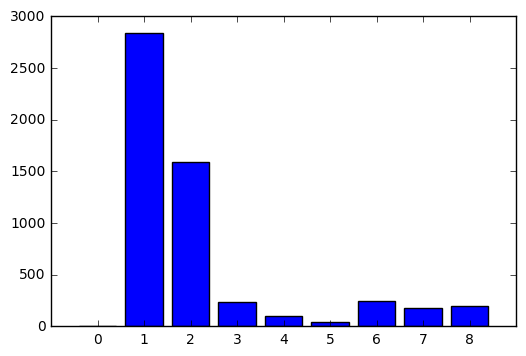

In [13]:
plt.bar(range(len(category_counter)),category_counter.values()
        ,align='center',tick_label=category_counter.keys())
plt.show()

In [14]:
lower_case=lambda x:x.lower()
remove_numb=lambda x: re.sub('[0-9]+', '', x)
#stop=stopwords.words()
#remove_stop=lambda s: ' '.join(filter(lambda s: not (s in stopwords.words()),
#                                      SpaceTokenizer().tokenize(s)))
remove_specialchar=lambda s: re.sub('[^a-zA-Z0-9 \n\.]','',s)
lemm=lambda s: ' '.join(map(lambda t: WordNetLemmatizer().lemmatize(t), SpaceTokenizer().tokenize(s)))
#remove_charater=lambda s:re.sub('\\b[a-zA-Z0-9]{1,3}\\b','',s)
remove_punctuation_map = dict((ord(char), None) for char in string.punctuation)
remove_punctions=lambda s:s.translate(remove_punctuation_map)
dataframe['data']=dataframe['data'].apply(lower_case)
dataframe['data']=dataframe['data'].apply(remove_numb)
#dataframe['data']=dataframe['data'].apply(remove_stop)
dataframe['data']=dataframe['data'].apply(lemm)
dataframe['data']=dataframe['data'].apply(remove_specialchar)
dataframe['data']=dataframe['data'].apply(remove_punctions)
#dataframe['data']=dataframe['data'].apply(remove_charater)

In [15]:
corpus=dataframe.data
all_words=[w.split() for w in corpus]
all_flat_words=[ewords for words in all_words for ewords in words]
all_flat_words_ns=[w for w in all_flat_words if w not in stopwords.words("english")]
set_nf=set(all_flat_words_ns)

In [16]:
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix=vectorizer.fit_transform(corpus).todense()
tfidf_names=vectorizer.get_feature_names()

In [19]:
variables = tfidf_matrix
labels = dataframe.target
variables_train, variables_test, labels_train, labels_test  =   \
    train_test_split(variables, labels, test_size=.3)

In [21]:
from sklearn.naive_bayes import MultinomialNB
mn_bayes=MultinomialNB()
mn_bayes_fit=mn_bayes.fit(variables_train,labels_train)
prediction_mn=mn_bayes_fit.predict(variables_test)
mn_ascore=sklearn.metrics.accuracy_score(labels_test, prediction_mn) 
print (mn_ascore)
sklearn.metrics.confusion_matrix(labels_test,prediction_mn)

0.837937384899


array([[862,   8,   0,   0,   0,   0,   0,   0],
       [ 28, 439,   0,   0,   0,   0,   0,   0],
       [ 21,  26,  30,   0,   0,   0,   0,   0],
       [  9,  26,   0,   0,   0,   0,   0,   0],
       [  5,   2,   0,   0,   0,   0,   0,   0],
       [ 28,  20,   0,   0,   0,  21,   0,   0],
       [ 34,  15,   0,   0,   0,   0,   2,   0],
       [ 17,  25,   0,   0,   0,   0,   0,  11]])

In [22]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier(n_estimators=50)
t0=time()
rf_classifier=rf_classifier.fit(variables_train,labels_train)
rf_predictions=rf_classifier.predict(variables_test)
rf_ascore=sklearn.metrics.accuracy_score(labels_test, rf_predictions) 
print (rf_ascore)
print(sklearn.metrics.confusion_matrix(labels_test,rf_predictions))

0.920810313076
[[  0   0   0   0   0   0   0   0   0]
 [  0 839  31   0   0   0   0   0   0]
 [  1   4 462   0   0   0   0   0   0]
 [  0   4   6  65   0   0   0   0   2]
 [  0   3  18   1  12   0   1   0   0]
 [  0   1   4   0   0   2   0   0   0]
 [  0   1  14   0   0   0  54   0   0]
 [  0   1   4   1   0   0   0  35  10]
 [  2   3   8   5   0   0   0   4  31]]
